In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from textblob import TextBlob,  Word
%run datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn



In [76]:
#CARGO DATASET

C_tweets = pd.read_csv("Data/train.csv")
C_CantTweetsEnDf=len(C_tweets.index)

In [95]:
# Quito "separador" %20 entre keywords, es solo un espacio.
# Por ejemplo, en uno decia natutal%20disaster, lo que seria "natural disater"(toda la frase es la keyword)
# No natural y disaster( por separado, dos key distintas )
C_tweets['keyword'] = C_tweets['keyword'].str.replace('%',' ')
C_tweets['keyword'] = C_tweets['keyword'].str.replace('2','')
C_tweets['keyword'] = C_tweets['keyword'].str.replace('0','')

In [78]:
#Cambio NaN por Nothing en Keyword
C_tweets['keyword'] = C_tweets['keyword'].fillna('Nothing') 

## Keyword en Texto

In [79]:
def keyword_in_text(df):
    """
    RECIBE: un df
    DEVUELVE: el mismo df con una columna que indica si la keyword esta en el tweet.
    """
    
    df['contains_keyword'] = 0
    cant_filas = len(df.index)
    for y in range(cant_filas):
        df['contains_keyword'][y:]= df.iloc[y][1].lower() in df.iloc[y][3].lower()

In [80]:
keyword_in_text(C_tweets)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [90]:
#Quito columnas que no uso
C_Contains = C_tweets.loc[:,["keyword","contains_keyword"]]

In [91]:
C_Contains.head(50)

,keyword,contains_keyword
0,Nothing,False
1,Nothing,False
2,Nothing,False
3,Nothing,False
4,Nothing,False
5,Nothing,False
6,Nothing,False
7,Nothing,False
8,Nothing,False
9,Nothing,False


In [93]:
C_tweets["contains_keyword"].value_counts()

True     6700
False     913
Name: contains_keyword, dtype: int64

In [ ]:
## Agregar un grafico, si es posible no de barplot

## Distintos keyword

In [7]:
C_tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
#Veo Distintos Keyword
C_keyword = C_tweets['keyword'].unique()

In [10]:
C_keyword

array(['Nothing', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail'

In [11]:
#Cuantas leyword distintas existen en el df
len(C_keyword)

222

In [12]:
#Agrupo por keyword  y cuenta las ocurrencias de cada uno
C_grouped = C_tweets.groupby(['keyword']).agg({'id':'count'}).rename(columns={"id": "cantidad"})

In [13]:
C_grouped.reset_index(inplace=True)

In [14]:
C_grouped

,keyword,cantidad
0,Nothing,61
1,ablaze,36
2,accident,35
3,aftershock,34
4,airplane%20accident,35
...,...,...
217,wounded,37
218,wounds,33
219,wreck,37
220,wreckage,39


In [16]:
#Chequeo
print ("Suma de keyword agrupadas:", C_grouped.cantidad.sum(), " = ","Cantidad de filas en df:" , len(C_tweets.index))

Suma de keyword agrupadas: 7613  =  Cantidad de filas en df: 7613


In [17]:
#Area del plot mas alto que ancho
plt.rcParams['figure.figsize'] = (15, 30)

Text(0.5, 1.0, 'Plot a poner Titulo')

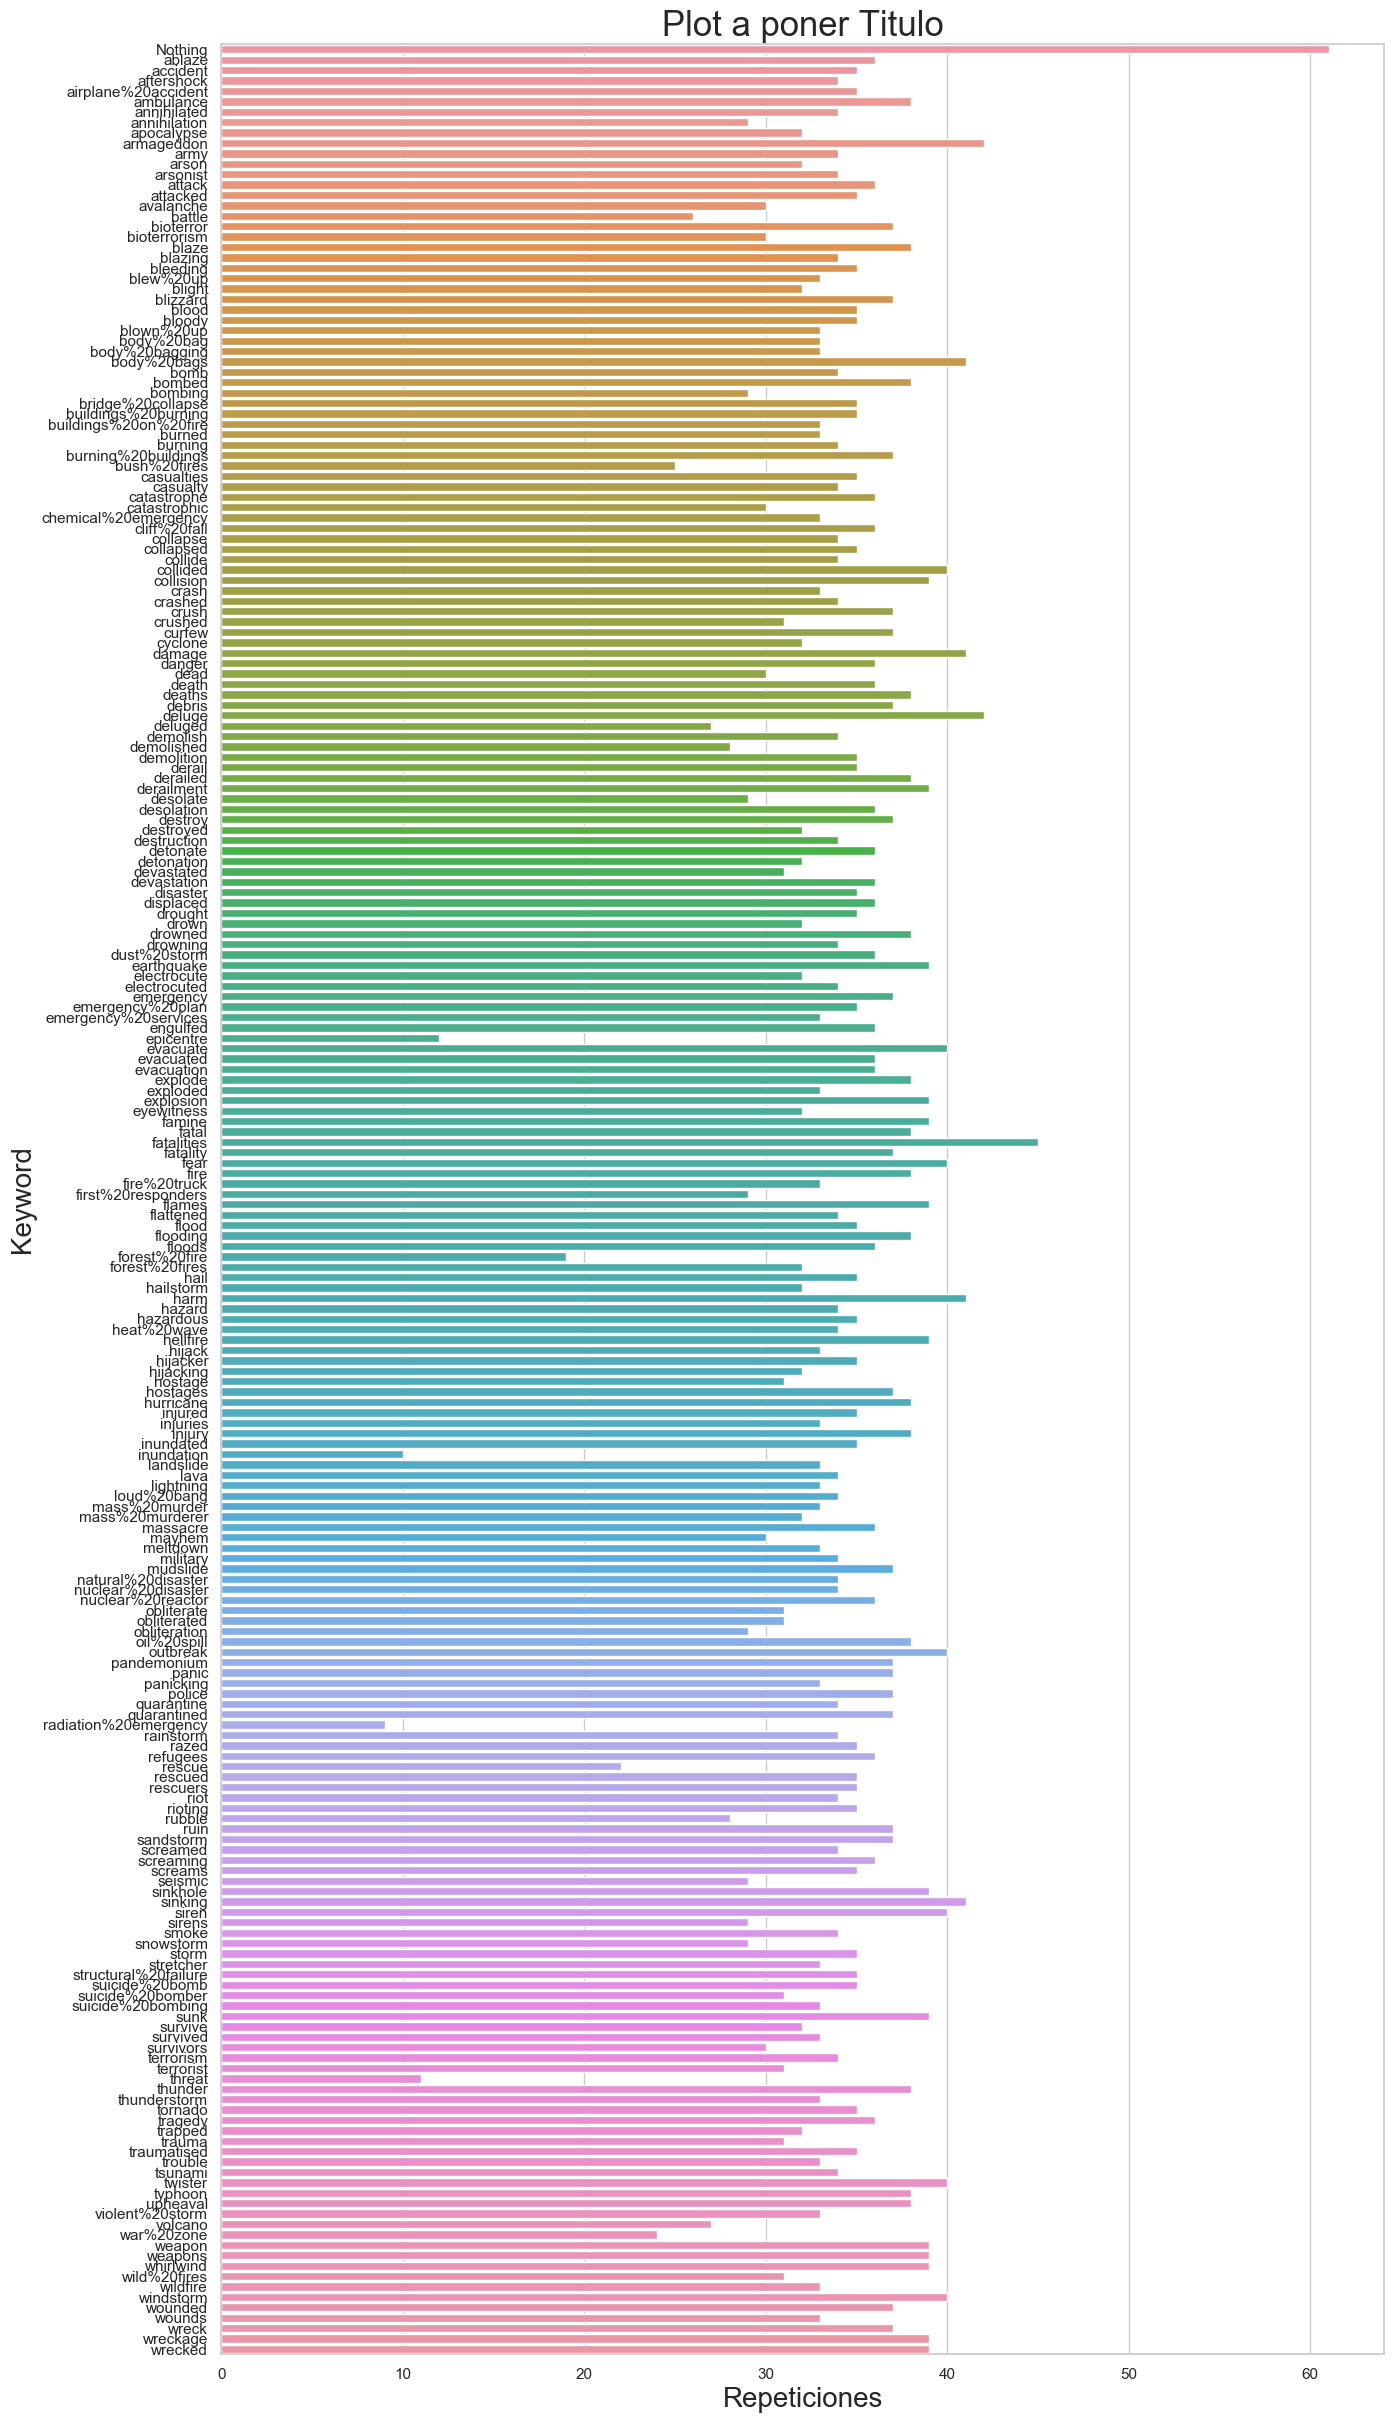

In [18]:
ax = sns.barplot(x="cantidad", y="keyword", data=C_grouped,orient='h')

ax.set_ylabel('Keyword', fontsize=20)
ax.set_xlabel('Repeticiones', fontsize=20)
ax.set_title("Plot a poner Titulo", fontsize=25)

In [19]:
#TODO, achicar keywords--> Agrupara los que significan casi lo mismo